In [1]:
import numpy as np
import astropy.units as u
from astropy.io import fits
import time 
from importlib import reload
import copy
from datetime import datetime
today = int(datetime.today().strftime('%Y%m%d'))
from IPython.display import clear_output

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Circle, Rectangle

import scoobi
from scoobi.math_module import xp, _scipy, ensure_np_array
from scoobi.imshows import imshow1, imshow2, imshow3
import scoobi.scoobi as scoobi

import lina

import purepyindi
from purepyindi import INDIClient
import purepyindi2
from purepyindi2 import IndiClient

client0 = INDIClient('localhost', 7624)
client0.start()
client = IndiClient()
client.connect()
client.get_properties()

def restart_clients():
    client0 = INDIClient('localhost', 7624)
    client0.start()

    client = IndiClient()
    client.connect()
    client.get_properties()

In [ ]:
scoobi.home_block(client0)

In [ ]:
scoobi.move_block_out(client0)

In [2]:
reload(scoobi)
xc, yc = (4263, 2920)
npsf = 256
scoobi.set_zwo_roi(xc, yc, npsf, client0)

In [3]:
reload(scoobi)
I = scoobi.SCOOBI(scicam_channel='camsci', dm_channel='dm00disp05')

In [9]:
scoobi.move_psf(-50, 0, client0)

In [16]:
reload(scoobi)
I.set_zwo_exp_time(0.00001, client0)

Minimum exposure time is 3.2E-5 seconds. Setting exposure time to minimum.
Set the ZWO exposure time to 3.20e-05s


In [11]:
reload(scoobi)
I.set_zwo_gain(150, client0)

Set the ZWO gain setting to 150.0


In [18]:
reload(scoobi)
I.set_fib_atten(29, client)

Set the fiber attenuation to 29.0


6104.08


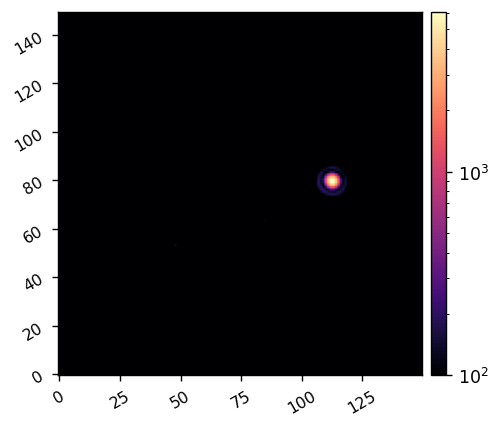

In [22]:
I.Nframes = 100
ref_psf = I.snap()
print(xp.max(ref_psf))
imshow1(ref_psf, lognorm=True, vmin=1e2)

In [21]:
exp_times = np.linspace(32e-6, 300e-6, 50)
exp_times

array([3.20000000e-05, 3.74693878e-05, 4.29387755e-05, 4.84081633e-05,
       5.38775510e-05, 5.93469388e-05, 6.48163265e-05, 7.02857143e-05,
       7.57551020e-05, 8.12244898e-05, 8.66938776e-05, 9.21632653e-05,
       9.76326531e-05, 1.03102041e-04, 1.08571429e-04, 1.14040816e-04,
       1.19510204e-04, 1.24979592e-04, 1.30448980e-04, 1.35918367e-04,
       1.41387755e-04, 1.46857143e-04, 1.52326531e-04, 1.57795918e-04,
       1.63265306e-04, 1.68734694e-04, 1.74204082e-04, 1.79673469e-04,
       1.85142857e-04, 1.90612245e-04, 1.96081633e-04, 2.01551020e-04,
       2.07020408e-04, 2.12489796e-04, 2.17959184e-04, 2.23428571e-04,
       2.28897959e-04, 2.34367347e-04, 2.39836735e-04, 2.45306122e-04,
       2.50775510e-04, 2.56244898e-04, 2.61714286e-04, 2.67183673e-04,
       2.72653061e-04, 2.78122449e-04, 2.83591837e-04, 2.89061224e-04,
       2.94530612e-04, 3.00000000e-04])

In [40]:
I.return_ni = False
I.Nframes = 20
psfs = []
max_vals = []
for i in range(len(exp_times)):
    I.set_zwo_exp_time(exp_times[i], client0, delay=1)
    im = I.snap()
    psfs.append(im)
    max_vals.append(xp.max(im))

Set the ZWO exposure time to 3.20e-05s
Set the ZWO exposure time to 3.75e-05s
Set the ZWO exposure time to 4.29e-05s
Set the ZWO exposure time to 4.84e-05s
Set the ZWO exposure time to 5.39e-05s
Set the ZWO exposure time to 5.93e-05s
Set the ZWO exposure time to 6.48e-05s
Set the ZWO exposure time to 7.03e-05s
Set the ZWO exposure time to 7.58e-05s
Set the ZWO exposure time to 8.12e-05s
Set the ZWO exposure time to 8.67e-05s
Set the ZWO exposure time to 9.22e-05s
Set the ZWO exposure time to 9.76e-05s
Set the ZWO exposure time to 1.03e-04s
Set the ZWO exposure time to 1.09e-04s
Set the ZWO exposure time to 1.14e-04s
Set the ZWO exposure time to 1.20e-04s
Set the ZWO exposure time to 1.25e-04s
Set the ZWO exposure time to 1.30e-04s
Set the ZWO exposure time to 1.36e-04s
Set the ZWO exposure time to 1.41e-04s
Set the ZWO exposure time to 1.47e-04s
Set the ZWO exposure time to 1.52e-04s
Set the ZWO exposure time to 1.58e-04s
Set the ZWO exposure time to 1.63e-04s
Set the ZWO exposure time

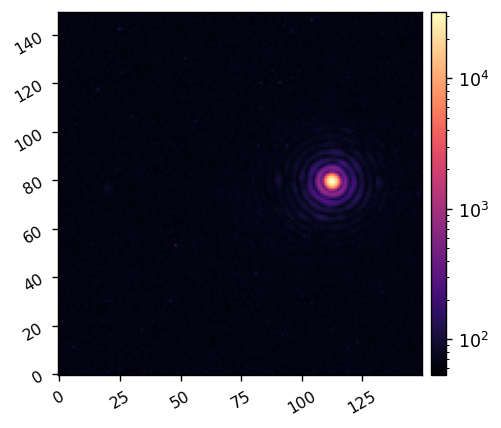

In [41]:
imshow1(psfs[-1], lognorm=True)

In [31]:
psfs.shape

(50, 150, 150)

In [42]:
max_vals

[array(32081.),
 array(32705.4),
 array(6225.6),
 array(6033.),
 array(6169.),
 array(6153.4),
 array(6102.6),
 array(6105.8),
 array(6136.4),
 array(6034.4),
 array(6125.8),
 array(6061.2),
 array(6155.2),
 array(6101.6),
 array(11701.2),
 array(11543.4),
 array(11417.8),
 array(11449.8),
 array(11208.4),
 array(11217.6),
 array(11214.6),
 array(16428.8),
 array(16575.),
 array(16377.6),
 array(17311.4),
 array(16375.4),
 array(16469.4),
 array(16808.2),
 array(21893.4),
 array(21825.8),
 array(21421.),
 array(21905.),
 array(21982.8),
 array(21782.2),
 array(22325.4),
 array(21651.8),
 array(26952.2),
 array(26520.2),
 array(26930.2),
 array(27275.6),
 array(26830.8),
 array(27274.4),
 array(26823.2),
 array(27035.6),
 array(32338.8),
 array(32478.2),
 array(32376.4),
 array(32171.6),
 array(32655.4),
 array(32361.)]

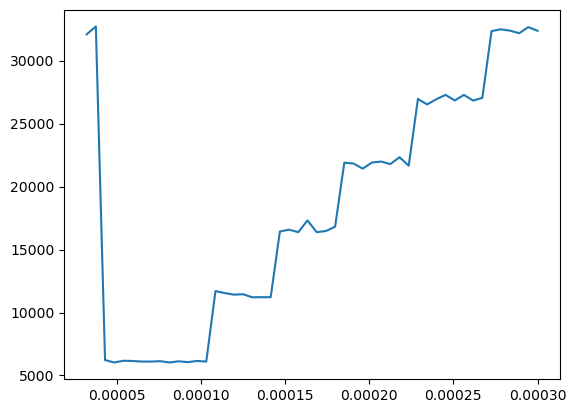

In [45]:
plt.plot(exp_times, ensure_np_array(xp.array(max_vals)))